In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/FinalData.csv")

In [ ]:
df.head()

,Order_Id,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,No_Of_Products,Amount
0,0,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,2,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,3,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,4,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_Id          11231 non-null  int64  
 1   Product_ID        11231 non-null  object 
 2   Gender            11231 non-null  object 
 3   Age               11231 non-null  int64  
 4   Marital_Status    11231 non-null  int64  
 5   State             11231 non-null  object 
 6   Zone              11231 non-null  object 
 7   Occupation        11231 non-null  object 
 8   Product_Category  11231 non-null  object 
 9   No_Of_Products    11231 non-null  int64  
 10  Amount            11231 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 965.3+ KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df["Gender"].value_counts()

Gender
F    7828
M    3403
Name: count, dtype: int64

In [ ]:
df['Marital_Status'].value_counts()

Marital_Status
0    6514
1    4717
Name: count, dtype: int64

Q1.What is the distribution of orders based on:
1.Gender
ans: In the data set given there are total 7828 Female persons and 3403 Males
2.Mariral status
ans: In the given data set there are total 6514 Unmarried and 4717 Married.


<Axes: xlabel='Gender', ylabel='count'>

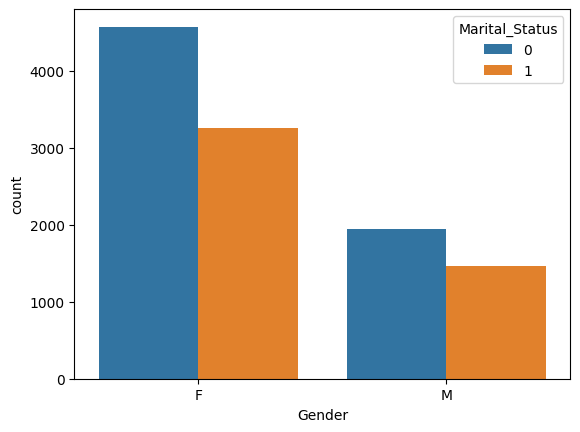

In [ ]:
sns.countplot(x="Gender",data=df,hue = "Marital_Status")

In [ ]:
df['Zone'].value_counts()

Zone
Central     4287
Southern    2693
Western     1948
Northern    1490
Eastern      813
Name: count, dtype: int64

Q2.group states according to their zones
ans:

In [ ]:
df.groupby('Zone')['State'].value_counts()

Zone      State           
Central   Uttar Pradesh       1942
          Delhi               1104
          Madhya Pradesh       921
          Uttarakhand          320
Eastern   Bihar                433
          Jharkhand            380
Northern  Himachal Pradesh     608
          Haryana              451
          Rajasthan            231
          Punjab               200
Southern  Karnataka           1304
          Andhra Pradesh       811
          Kerala               453
          Telangana            125
Western   Maharashtra         1522
          Gujarat              426
Name: count, dtype: int64

Q3.is there a significant difference in the average order amount between different zones
ans:No,not so much the maximum difference is around 1412

In [ ]:
df.groupby('Zone')['Amount'].mean()

Zone
Central     9697.214941
Eastern     8660.670357
Northern    8467.414765
Southern    9879.936495
Western     9416.132444
Name: Amount, dtype: float64

In [ ]:
df.head()

,Order_Id,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,No_Of_Products,Amount
0,0,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,2,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,3,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,4,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [ ]:
df['Occupation'].value_counts()

Occupation
IT Sector          1581
Healthcare         1408
Aviation           1309
Banking            1137
Govt                854
Hospitality         700
Media               637
Automobile          565
Chemical            541
Lawyer              531
Retail              501
Food Processing     423
Construction        413
Textile             349
Agriculture         282
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Occupation_encoded'] = le.fit_transform(df['Occupation'])
df['Product_Category_encoded'] = le.fit_transform(df['Product_Category'])
df['Gender_encoded'] = le.fit_transform(df['Gender'])
df['State_encoded'] = le.fit_transform(df['State'])

In [ ]:
df.head()

,Order_Id,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,No_Of_Products,Amount,Occupation_encoded,Product_Category_encoded,Age_Category,Gender_encoded,State_encoded
0,0,P00125942,F,28,0,Maharashtra,Western,8,Auto,1,23952.0,8,0,26-35,0,10
1,1,P00110942,F,35,1,Andhra Pradesh,Southern,7,Auto,3,23934.0,7,0,36-45,0,0
2,2,P00118542,F,35,1,Uttar Pradesh,Central,1,Auto,3,23924.0,1,0,36-45,0,14
3,3,P00237842,M,16,0,Karnataka,Southern,5,Auto,2,23912.0,5,0,0-17,1,7
4,4,P00057942,M,28,1,Gujarat,Western,6,Auto,2,23877.0,6,0,26-35,1,3


In [ ]:
corr = df['Occupation_encoded'].corr(df['Product_Category_encoded'])
corr

-0.00022668609187396946

Q4.Is there an association between occupation and product category preference?
ans:No,the correlation value is very low so no association between them

Q5. categorize customers into age ranges (0-17, 18-25, 26-35, 36-45, 46-55, 56+)

In [ ]:
df['Age_Category'] = pd.cut(df['Age'], bins=[0, 17, 25, 35, 45, 55,100],labels=['0-17', '18-25', '26-35', '36-45', '46-55', '56-100'],right=False,include_lowest = True)

Q6. Order the age groups according to: - No of orders  

In [ ]:
df.groupby('Age_Category')['No_Of_Products'].sum().sort_values()

Age_Category
0-17        582
56-100     1478
18-25      4197
46-55      4689
36-45      6121
26-35     10888
Name: No_Of_Products, dtype: int64

-Average amount spent of orders

In [ ]:
df.groupby('Age_Category')['Amount'].mean().sort_values()

Age_Category
0-17      9167.664000
18-25     9169.779481
26-35     9337.805740
46-55     9574.276668
56-100    9701.617496
36-45     9733.622245
Name: Amount, dtype: float64

List of 5 product categories for
-Men

In [ ]:
df.groupby('Gender')['Product_Category'].value_counts().loc['M'][:5]

Product_Category
Clothing & Apparel       799
Food                     719
Electronics & Gadgets    610
Footwear & Shoes         277
Household items          236
Name: count, dtype: int64

-Female

In [ ]:
df.groupby('Gender')['Product_Category'].value_counts().loc['F'][:5]

Product_Category
Clothing & Apparel       1854
Food                     1771
Electronics & Gadgets    1472
Footwear & Shoes          782
Beauty                    325
Name: count, dtype: int64

In [ ]:
corr_1 = df['Age'].corr(df['Amount'])
corr_1

0.03043821187997906

Q8. Is there a significant correlation between Age and Amount spent?


ans: No,it is very weak correlation

Q9. Build and evaluate a logistic regression model to predict whether a customer will
purchase "Clothing & Apparel" based on age, gender, marital status, state, and
occupation. (Don't Bother about accuracy)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X = df[['Age', 'Gender_encoded', 'Marital_Status', 'State_encoded', 'Occupation_encoded']]
y = df['Product_Category_encoded']

In [ ]:
X = np.asarray(X)
Y = np.asarray(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_pred_train = model.predict(X_train)

In [ ]:
score = accuracy_score(y_train, Y_pred_train)
print(score)

0.24120658949243098
